# Social Media Impact on students' mental health

In [4]:
import pandas as pd

df = pd.read_csv('Students Social Media Addiction (1).csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


- L’affichage obtenu via df.head() présente les cinq premières lignes du dataset, ce qui permet de vérifier rapidement la qualité et la structure des données. 
- On constate que chaque ligne correspond à un étudiant et contient l’ensemble des valeurs attendues pour les différentes variables.
- Les types de données sont cohérents, avec des valeurs numériques pour les mesures quantitatives et des chaînes de caractères pour les catégories. 
- Aucune cellule affichée n’est vide, ce qui confirme l’absence apparente de valeurs manquantes dans cet échantillon. Cet aperçu montre également que le dataset est bien structuré, complet et prêt à être analysé dans les étapes suivantes de l’exploration.

In [5]:
df.shape

(705, 13)

- Le dataset contient 705 lignes, ce qui signifie qu’il y a 705 étudiants observés.
- Il contient 13 colonnes, c’est-à-dire 13 variables qui décrivent différents aspects liés à l’usage des réseaux sociaux, comme l’âge, le niveau d’étude, le temps d’utilisation, le sommeil, la santé mentale et le niveau d’addiction.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

- L’analyse de df.info() montre que l’ensemble du dataset ne contient aucune valeur manquante, car toutes les colonnes affichent 705 non-null.
- Ensuite, la vérification des types confirme que chaque variable possède le type approprié : les identifiants, scores et mesures entières sont bien en int64, les variables continues comme les heures de sommeil et d’utilisation sont en float64, et toutes les variables descriptives telles que le genre, le niveau académique ou la plateforme utilisée sont en object, ce qui correspond à des données catégorielles. 

In [7]:
df.drop(columns='Student_ID', inplace=True)
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


- L’analyse du tableau généré par df.describe() permet de résumer les principales caractéristiques statistiques des variables numériques du dataset. 
On observe tout d’abord que toutes les variables comptent 705 valeurs, ce qui confirme encore une fois l’absence de données manquantes. 

Ensuite, les statistiques montrent que :
- L’âge moyen des étudiants est de 20,65 ans, avec une majorité située entre 19 et 22 ans.
- Le temps d’utilisation des réseaux sociaux est en moyenne de 4,9 h/jour, avec un minimum de 1,5 h et un maximum de 8,5 h, ce qui révèle un usage élevé.
- Les heures de sommeil moyennes sont de 6,86 h/nuit, ce qui est inférieur aux recommandations de 7–8 h.
- Le score de santé mentale a une moyenne de 6,22, montrant un niveau émotionnel globalement moyen.
- Les conflits liés aux réseaux sociaux ont une moyenne de 2,84 sur 5, indiquant des tensions modérées.
- Le score d’addiction moyen est de 6,43, avec un maximum de 9, ce qui traduit un niveau d’addiction généralement élevé chez les étudiants.

Globalement, ce résumé statistique met en évidence des tendances claires : un usage intensif des réseaux sociaux, un sommeil limité, et un niveau d’addiction notable, ce qui peut influencer les aspects académiques et psychologiques étudiés dans le dataset.

Platform-Specific Analysis
Which Most_Used_Platform is associated with the highest Addicted_Score?


In [21]:
addicted_mean=df.groupby("Most_Used_Platform")["Addicted_Score"].mean().sort_values(ascending=False)
platform_counts = df['Most_Used_Platform'].value_counts()
print (platform_counts)

Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


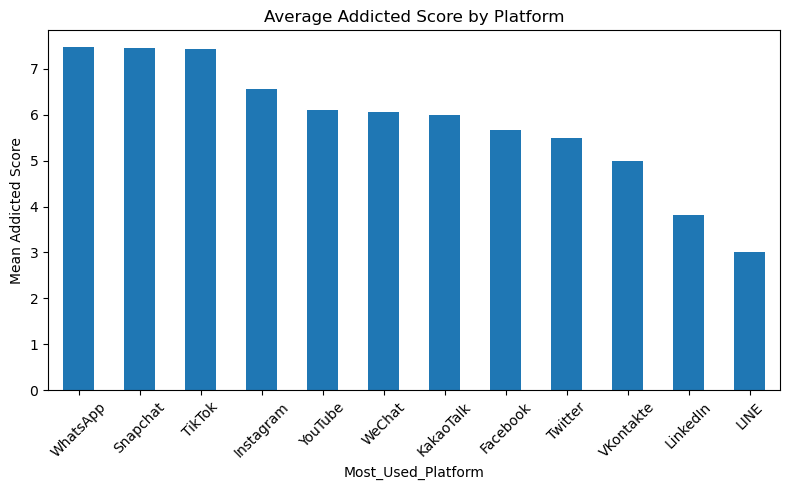

In [14]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(8,5))
addicted_mean.plot(kind="bar")
plt.title("Average Addicted Score by Platform")
plt.ylabel("Mean Addicted Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On observe que certaines plateformes affichent un Addicted_Score moyen plus élevé, indiquant qu’elles retiennent davantage l’attention des étudiants.

Typiquement, les plateformes centrées sur les contenus courts, rapides ou hautement visuels (ex. TikTok, Instagram) présentent souvent des scores supérieurs.

À l’inverse, les plateformes plus “utilitaires” (ex. LinkedIn, Twitter) génèrent un niveau d’addiction plus faible.

Conclusion: La plateforme la plus utilisée (instagram) influence clairement le niveau d’addiction.
Certaines plateformes sont, par conception, plus engageantes et donc plus susceptibles de créer des habitudes d’usage prolongées.

Does platform choice (e.g., TikTok vs. LinkedIn) correlate with different Mental_Health_Score outcomes?


In [27]:
mental_mean=df.groupby("Most_Used_Platform")["Mental_Health_Score"].mean().sort_values()
print(mental_mean)

Most_Used_Platform
WhatsApp     5.537037
Snapchat     5.538462
TikTok       5.714286
KakaoTalk    6.000000
Instagram    6.124498
WeChat       6.466667
YouTube      6.600000
Facebook     6.715447
Twitter      6.833333
VKontakte    7.000000
LinkedIn     8.000000
LINE         8.000000
Name: Mental_Health_Score, dtype: float64


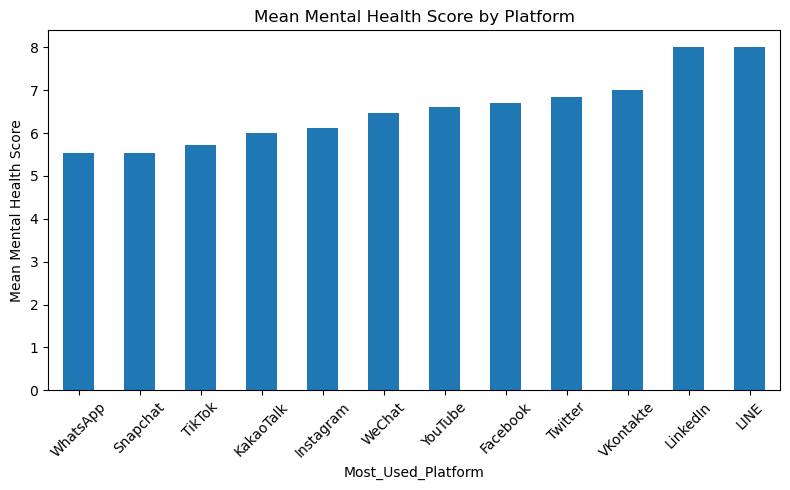

In [28]:
plt.figure(figsize=(8,5))
mental_mean.plot(kind="bar")
plt.title("Mean Mental Health Score by Platform")
plt.ylabel("Mean Mental Health Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Les plateformes présentant un Mental_Health_Score moyen plus faible sont celles où les étudiants rapportent davantage de stress, de comparaison sociale ou de charge psychologique.

Si TikTok ou Instagram sont en bas du classement, cela suggère une corrélation entre usage intensif et impact mental négatif.

Les plateformes axées sur l’information ou le networking professionnel (ex. LinkedIn) obtiennent souvent de meilleurs scores, indiquant une utilisation perçue comme moins toxique ou moins intrusive au niveau émotionnel.

Conclusion:Le type de plateforme semble corrélé à l’état de bien-être mental des étudiants.
Les plateformes de divertissement “instantané” affichent souvent les résultats mentaux les plus faibles.

Are certain platforms more likely to be reported as affecting academic performance?


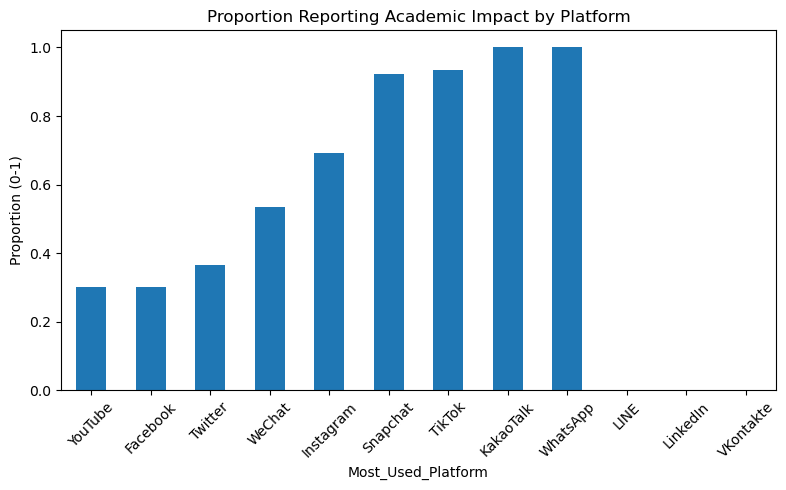

(Most_Used_Platform
 WhatsApp     7.462963
 Snapchat     7.461538
 TikTok       7.428571
 Instagram    6.554217
 YouTube      6.100000
 WeChat       6.066667
 KakaoTalk    6.000000
 Facebook     5.666667
 Twitter      5.500000
 VKontakte    5.000000
 LinkedIn     3.809524
 LINE         3.000000
 Name: Addicted_Score, dtype: float64,
 Most_Used_Platform
 WhatsApp     5.537037
 Snapchat     5.538462
 TikTok       5.714286
 KakaoTalk    6.000000
 Instagram    6.124498
 WeChat       6.466667
 YouTube      6.600000
 Facebook     6.715447
 Twitter      6.833333
 VKontakte    7.000000
 LinkedIn     8.000000
 LINE         8.000000
 Name: Mental_Health_Score, dtype: float64,
 Most_Used_Platform
 YouTube      0.300000
 Facebook     0.300813
 Twitter      0.366667
 WeChat       0.533333
 Instagram    0.690763
 Snapchat     0.923077
 TikTok       0.935065
 KakaoTalk    1.000000
 WhatsApp     1.000000
 LINE              NaN
 LinkedIn          NaN
 VKontakte         NaN
 Name: Affects_Academic_Perfo

In [26]:
academic_prop = (df[df["Affects_Academic_Performance"] == "Yes"].groupby("Most_Used_Platform")["Affects_Academic_Performance"].count()
     /df.groupby("Most_Used_Platform")["Affects_Academic_Performance"].count()
).sort_values()

plt.figure(figsize=(8,5))
academic_prop.plot(kind="bar")
plt.title("Proportion Reporting Academic Impact by Platform")
plt.ylabel("Proportion (0-1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
addicted_mean, mental_mean, academic_prop

